# Figure S5: Model-free analysis of intra-session modulations of inter-run durations.
## &
# Figure S10: Model-free analysis of intra-session modulations of run durations. 

# setup and imports

In [4]:
import fnmatch
import matplotlib.pyplot as plt
import numpy as np
import glob

from sessionlists import (dist60, dist90, dist120, TM20, TM10, TM2, TMrev2, TMrev10, TMrev20)
from utils import *
from plotting import *
from model_functions import *

plt.style.use('./Figures/paper.mplstyle')

In [5]:
# Define folder with data
root = "/home/thomas/Desktop/ALLDATA"

print("Path to data is: %s"%root)
print(f'Found {len(glob.glob(root+"/*"))} rats in the data folder')

Path to data is: /home/thomas/Desktop/ALLDATA
Found 34 rats in the data folder


In [6]:
# INTACT RATS
animalList = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 
            'RatF32', 'RatF33', 'RatM31', 'RatM32', 'RatF42', 'RatM40', 'RatM43', 
            'RatM53', 'RatM54']

rat_markers = {}
m, f = 0, 0
male_palette = create_teal_palette(num_shades=len([x for x in animalList if 'M' in x]))
female_palette = create_blue_violet_palette(num_shades=len([x for x in animalList if 'F' in x]), start_intensity=80)

for index, animal in enumerate(animalList):
    print(f'Loading data for {animal}')
    # define marker and color for each rat, used in plots
    if fnmatch.fnmatch(animal, 'RatF*'):
        rat_markers[animal]=[female_palette[f], 'o', ]
        f += 1
    elif fnmatch.fnmatch(animal, 'RatM*'):
        rat_markers[animal]=[male_palette[m], 'o', ]
        m += 1
    elif fnmatch.fnmatch(animal, 'Rat00*'):
        rat_markers[animal]=[(0.0, 0.0, 0.0), "$\u2426$",]
    else:
        print("error, this is not a rat you got here")

Loading data for RatF00
Loading data for RatF01
Loading data for RatF02
Loading data for RatM00
Loading data for RatM01
Loading data for RatM02
Loading data for RatF32
Loading data for RatF33
Loading data for RatM31
Loading data for RatM32
Loading data for RatF42
Loading data for RatM40
Loading data for RatM43
Loading data for RatM53
Loading data for RatM54


# Figure S5A and S10A run and inter-run durations 0-10min vs. 50-60min (left) and 10% blocks vs. 90% blocks (right) for 1 rat example session

# Figure S5B and S10B run and inter-run durations 0-10min vs. 50-60min (left) and 10% blocks vs. 90% blocks (right) for 1 rat all 120cm sessions

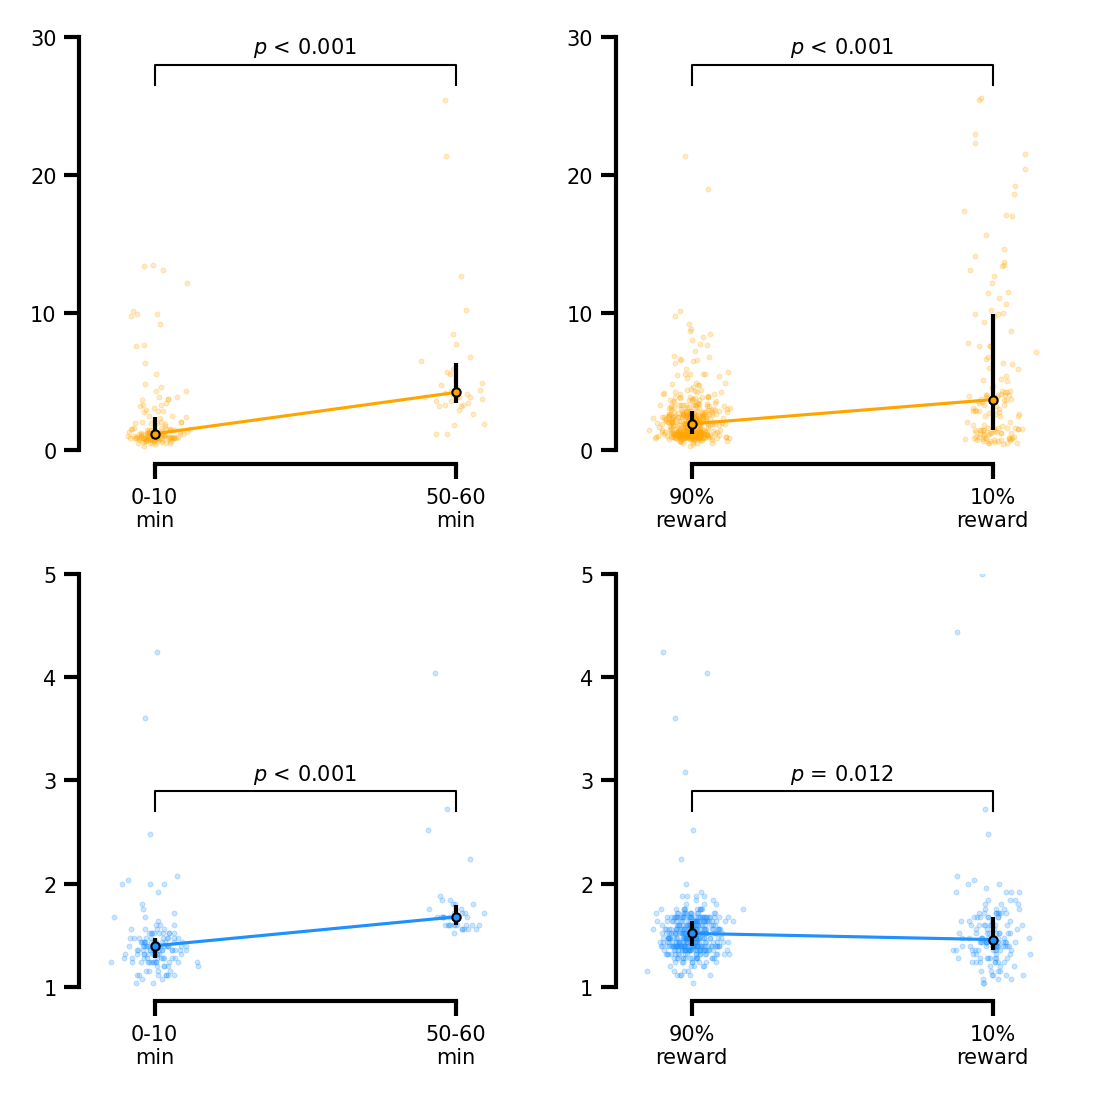

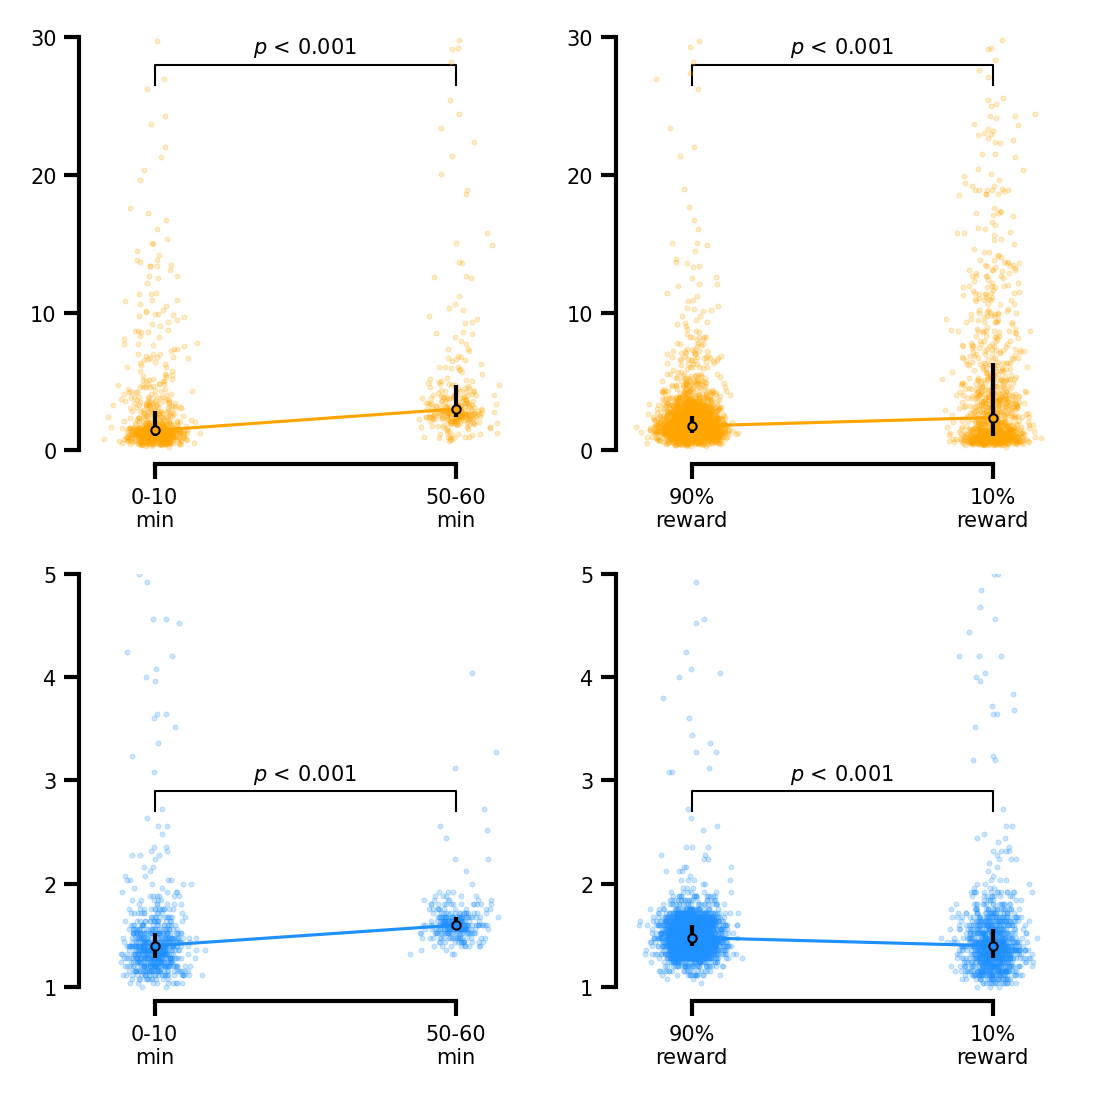

In [7]:
def FigureS5AB_S10AB(root, animal='RatM00', ax=None, type='run', t_or_u='t', all120sessions=False, plot_ylabel=False):
    
    assert type in ['run', 'interrun']
    assert t_or_u in ['t', 'u']

    warnings.simplefilter("ignore", category=RuntimeWarning)
    if ax is None:
        ax = plt.gca()

    pool_0 = []
    pool_1 = []
    if all120sessions:
        sessions = dist120
    else:
        sessions = ['RatM00_2021_07_22_16_13_03']

    for session in matchsession(animal, sessions):
        params = get_from_pickle(root, animal, session, name="params.p")

        if type == 'run':
            dataleft, dataright = get_from_pickle(root, animal, session, name="timeRun.p")
            if plot_ylabel:
                ax.set_ylabel("Run duration (s)", color='dodgerblue')
            color='dodgerblue'
            darkcolor = 'k'
            bary = 2.5
            ax.set_ylim(1, 5)
            ax.set_yticks([1, 2, 3, 4, 5])

        elif type == 'interrun':
            dataleft, dataright = get_from_pickle(root, animal, session, name="timeinZone.p")
            if plot_ylabel:
                ax.set_ylabel("Inter-run duration (s)", color='orange')
            color='orange'
            darkcolor='k'
            bary = 25
            ax.set_ylim(0, 30)
            ax.set_yticks([0, 10, 20, 30])

        if t_or_u == 't':
            data_0 = np.asarray([dataleft[0]+dataright[0] + dataleft[1]+dataright[1]]).flatten()
            data_1 = np.asarray([dataleft[10]+dataright[10] + dataleft[11]+dataright[11]]).flatten()
            ax.set_xlim(0, 1)
            ax.set_xticks([0, 1])
            ax.set_xticklabels(["0-10\nmin", "50-60\nmin"])

        elif t_or_u == 'u':
            data_0 = np.asarray([dataleft[0]+dataright[0] + dataleft[2]+dataright[2] + dataleft[4]+dataright[4] +
                                dataleft[6]+dataright[6] + dataleft[8]+dataright[8] + dataleft[10]+dataright[10]]).flatten()
            data_1 = np.asarray([dataleft[1]+dataright[1] + dataleft[3]+dataright[3] + dataleft[5]+dataright[5] +
                                dataleft[7]+dataright[7] + dataleft[9]+dataright[9] + dataleft[11]+dataright[11]]).flatten()
            ax.set_xlim(0, 1)
            ax.set_xticks([0, 1])
            ax.set_xticklabels(["90%\nreward", "10%\nreward"])
        
        pool_0.append(data_0)
        pool_1.append(data_1)

    pool_0 = np.concatenate(pool_0)
    pool_1 = np.concatenate(pool_1)

    ax.scatter([np.random.normal(0, 0.05) for _ in pool_0], pool_0, marker='o', s=.15, color=color, zorder=3, alpha=0.33, rasterized=True)
    ax.scatter([np.random.normal(1, 0.05) for _ in pool_1], pool_1, marker='o', s=.15, color=color, zorder=3, alpha=0.33, rasterized=True)
        
    median_0 = np.median(pool_0)
    top_0 = np.percentile(pool_0, 75)
    bot_0 = np.percentile(pool_0, 25)

    median_1 = np.median(pool_1)
    top_1 = np.percentile(pool_1, 75)
    bot_1 = np.percentile(pool_1, 25)

    ax.errorbar([0, 1], [median_0, median_1],
                yerr=[[median_0-bot_0, median_1-bot_1], [top_0-median_0, top_1-median_1]],
                marker='o', ms=2, color=color, ecolor=darkcolor, lw=.75, elinewidth=1,
                zorder=4, markeredgecolor=darkcolor, markeredgewidth=0.5, alpha=1)

    perm = exact_mc_perm_test(pool_0, pool_1)
    barplot_annotate_brackets(ax, 0, 1, perm, [0, 1], [bary, bary], maxasterix=None)
    space_axes(ax, x_ratio_left=0.25, x_ratio_right=0.25)

fig, axs = plt.subplots(2, 2, figsize = (cm2inch(9), cm2inch(9)))
FigureS5AB_S10AB(ax=axs[0, 0], root=root, type='interrun', t_or_u='t') 
FigureS5AB_S10AB(ax=axs[0, 1], root=root, type='interrun', t_or_u='u') 
FigureS5AB_S10AB(ax=axs[1, 0], root=root, type='run', t_or_u='t') 
FigureS5AB_S10AB(ax=axs[1, 1], root=root, type='run', t_or_u='u')

fig, axs = plt.subplots(2, 2, figsize = (cm2inch(9), cm2inch(9)))
FigureS5AB_S10AB(ax=axs[0, 0], root=root, type='interrun', t_or_u='t', all120sessions=True) 
FigureS5AB_S10AB(ax=axs[0, 1], root=root, type='interrun', t_or_u='u', all120sessions=True) 
FigureS5AB_S10AB(ax=axs[1, 0], root=root, type='run', t_or_u='t', all120sessions=True) 
FigureS5AB_S10AB(ax=axs[1, 1], root=root, type='run', t_or_u='u', all120sessions=True) 

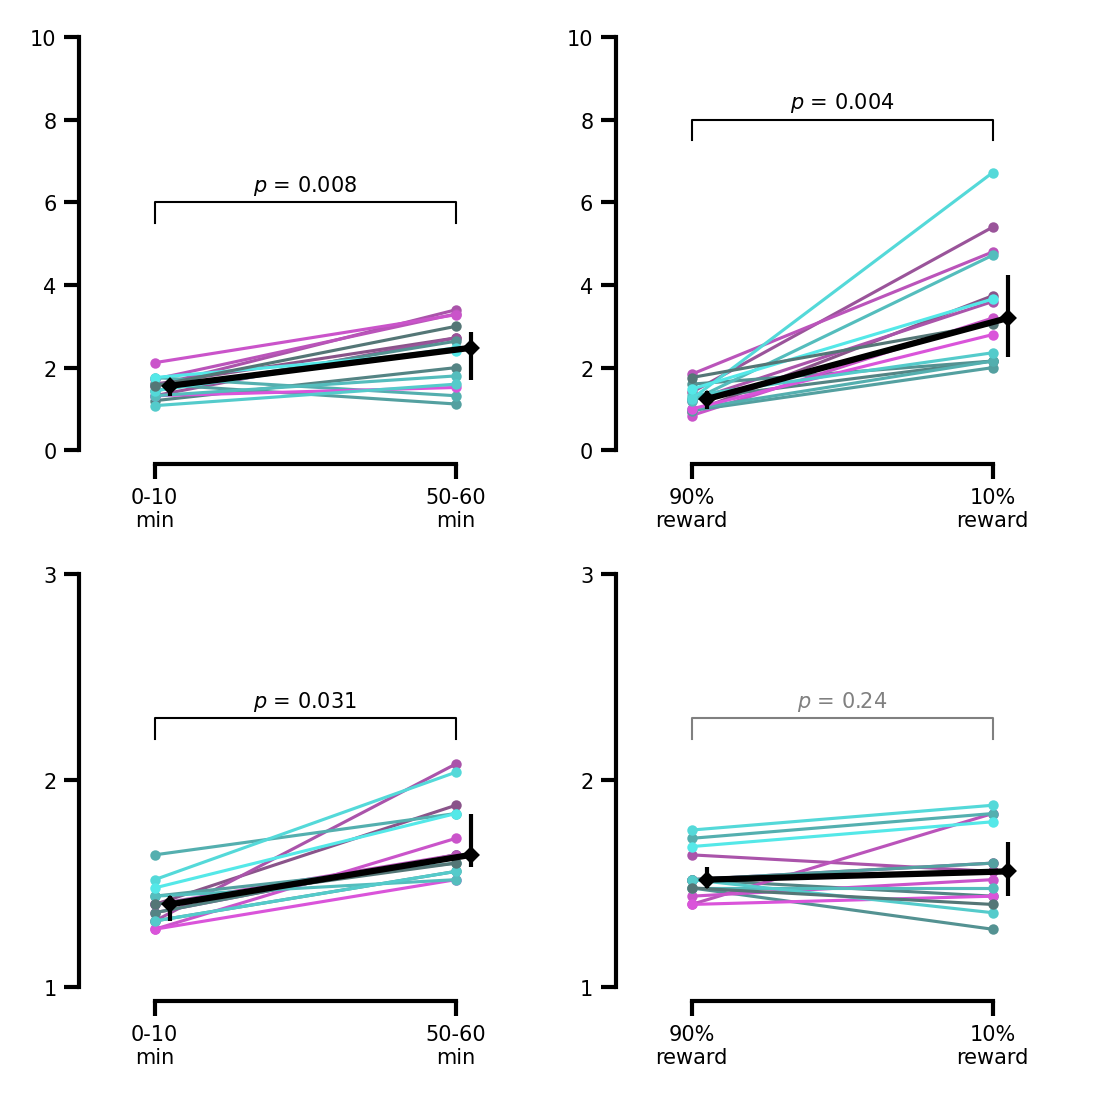

In [8]:
def FigureS5CS_10C(root, animal='RatM00', ax=None, type='run', t_or_u='t', plot_ylabel=False):
    
    assert type in ['run', 'interrun']
    assert t_or_u in ['t', 'u']

    warnings.simplefilter("ignore", category=RuntimeWarning)
    if ax is None:
        ax = plt.gca()

    sessions = dist120
    pool_0 = {}
    pool_1 = {}
    median_0 = {}
    top_0 = {}
    bot_0 = {}

    median_1 = {}
    top_1 = {}
    bot_1 = {}

    for animal in animalList:
        pool_0[animal] = []
        pool_1[animal] = []
        for session in matchsession(animal, sessions):
            if type == 'run':
                dataleft, dataright = get_from_pickle(root, animal, session, name="timeRun.p")
                if plot_ylabel:
                    ax.set_ylabel("Run duration (s)", color='dodgerblue')
                bary = 2.1
                ax.set_ylim(1, 3)
                ax.set_yticks([1, 2, 3])

            elif type == 'interrun':
                dataleft, dataright = get_from_pickle(root, animal, session, name="timeinZone.p")
                if plot_ylabel:
                    ax.set_ylabel("Inter-run duration (s)", color='orange')
                bary = 5 if t_or_u == 't' else 7
                ax.set_ylim(0, 10)
                ax.set_yticks([0, 2, 4, 6, 8, 10])

            if t_or_u == 't':
                data_0 = np.asarray([dataleft[0]+dataright[0] + dataleft[1]+dataright[1]]).flatten()
                data_0 = data_0[data_0>.75]  # these are filtered out in the analysis, very rare
                data_1 = np.asarray([dataleft[10]+dataright[10] + dataleft[11]+dataright[11]]).flatten()
                ax.set_xlim(0, 1)
                ax.set_xticks([0, 1])
                ax.set_xticklabels(["0-10\nmin", "50-60\nmin"])

            elif t_or_u == 'u':
                data_0 = np.asarray([dataleft[0]+dataright[0] + dataleft[2]+dataright[2] + dataleft[4]+dataright[4] +
                                    dataleft[6]+dataright[6] + dataleft[8]+dataright[8] + dataleft[10]+dataright[10]]).flatten()
                data_1 = np.asarray([dataleft[1]+dataright[1] + dataleft[3]+dataright[3] + dataleft[5]+dataright[5] +
                                    dataleft[7]+dataright[7] + dataleft[9]+dataright[9] + dataleft[11]+dataright[11]]).flatten()
                data_1 = data_1[data_1>.75]  # these are filtered out in the analysis, very rare
                ax.set_xlim(0, 1)
                ax.set_xticks([0, 1])
                ax.set_xticklabels(["90%\nreward", "10%\nreward"])
            
            pool_0[animal].append(data_0)
            pool_1[animal].append(data_1)

        pool_0[animal] = np.concatenate(pool_0[animal])
        pool_1[animal] = np.concatenate(pool_1[animal])

        
        median_0[animal] = np.median(pool_0[animal])
        top_0[animal] = np.percentile(pool_0[animal], 75)
        bot_0[animal] = np.percentile(pool_0[animal], 25)

        median_1[animal] = np.median(pool_1[animal])
        top_1[animal] = np.percentile(pool_1[animal], 75)
        bot_1[animal] = np.percentile(pool_1[animal], 25)

        ax.plot([0, 1], [median_0[animal], median_1[animal]],
                    marker='o', ms=2, color=rat_markers[animal][0], lw=.75,
                    zorder=6 if animal == 'RatM00' else 4,
                    markeredgecolor=rat_markers[animal][0], markeredgewidth=0.5, alpha=1)

    group_0 = np.asarray([np.median(pool_0[animal]) for animal in animalList])
    group_1 = np.asarray([np.median(pool_1[animal]) for animal in animalList])

    ax.errorbar([0.05, 1.05], [np.median(group_0), np.median(group_1)],
                yerr=[[np.median(group_0)-np.percentile(group_0, 25), np.median(group_1)-np.percentile(group_1, 25)], 
                      [np.percentile(group_0, 75)-np.median(group_0), np.percentile(group_1, 75)-np.median(group_1)]],
                capsize=0, color='k', marker='D', markersize=2, linestyle='-', lw=1.5, elinewidth=1, zorder=100)

    perm = exact_mc_perm_paired_test(group_0, group_1)
    barplot_annotate_brackets(ax, 0, 1, perm, [0, 1], [bary, bary], maxasterix=None)

    ax.plot([-100, -101], [-100, -101], color='k', marker='D', markersize=2, linestyle='-', lw=1.5, label=f'Median', zorder=5)

    space_axes(ax, x_ratio_left=0.25, x_ratio_right=0.25)

fig, axs = plt.subplots(2, 2, figsize = (cm2inch(9), cm2inch(9)))
FigureS5CS_10C(ax=axs[0, 0], root=root, type='interrun', t_or_u='t') 
FigureS5CS_10C(ax=axs[0, 1], root=root, type='interrun', t_or_u='u') 
FigureS5CS_10C(ax=axs[1, 0], root=root, type='run', t_or_u='t') 
FigureS5CS_10C(ax=axs[1, 1], root=root, type='run', t_or_u='u') 

# Figure S5: Model-free analysis of intra-session modulations of inter-run durations.

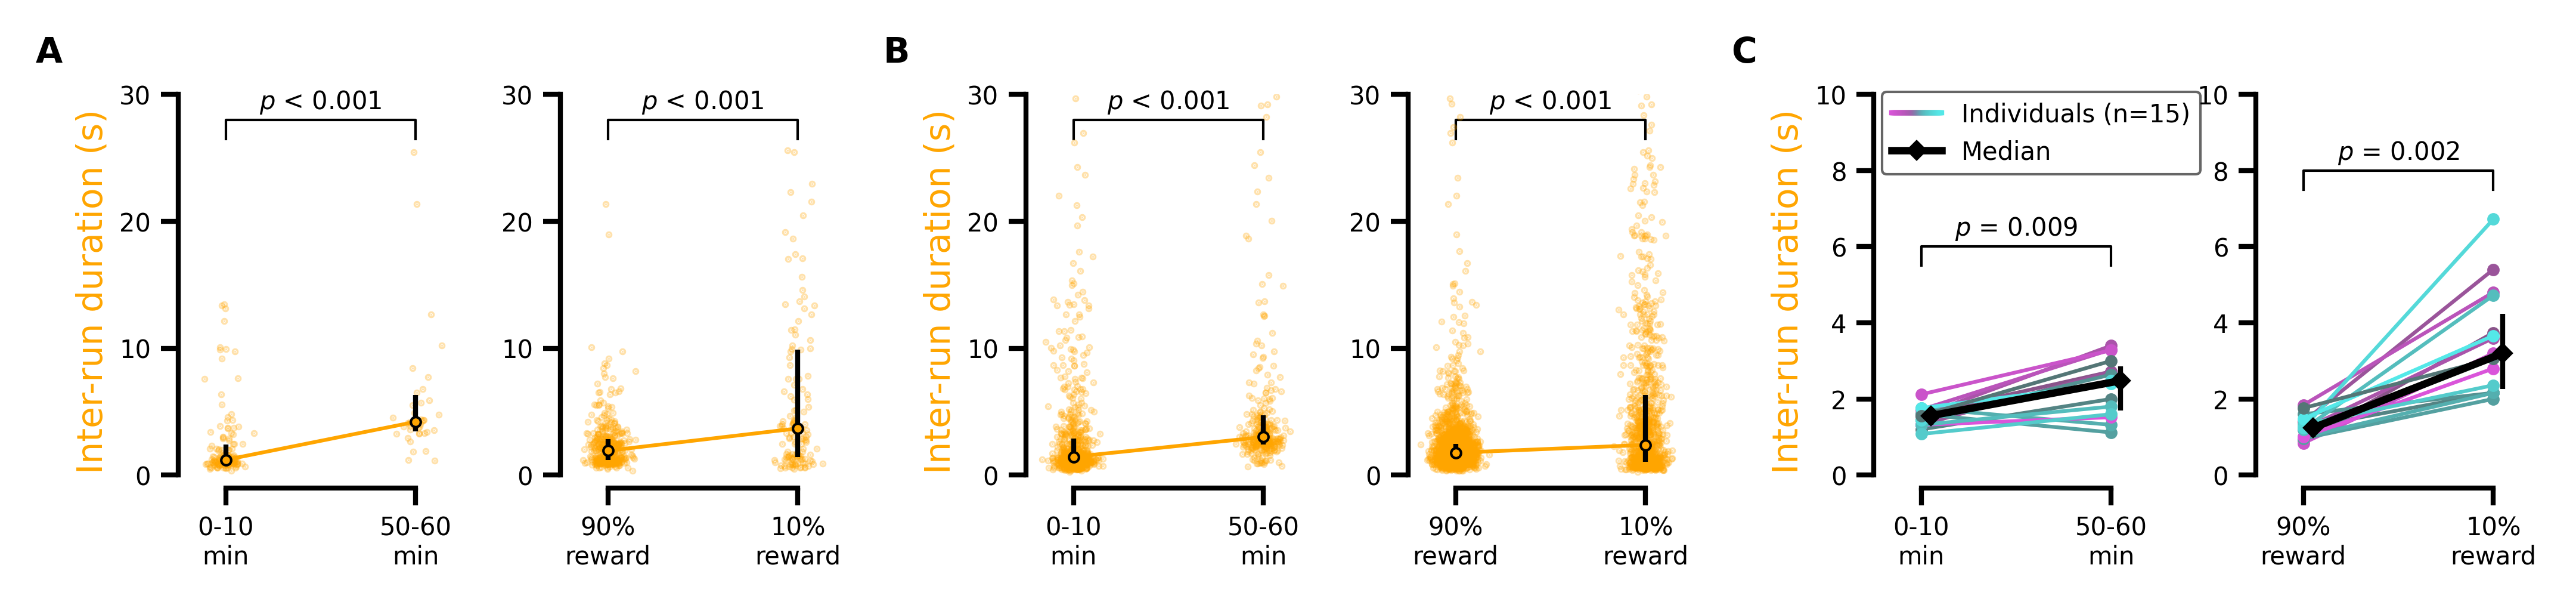

In [9]:
fig = plt.figure(figsize=(cm2inch(18), cm2inch(4)), 
                 constrained_layout=True, facecolor='w', dpi=600)

gs = fig.add_gridspec(1, 6, height_ratios=[1], width_ratios=[1, 1, 1, 1, 1, 1])

one_rat_one_session_interrun_t = plt.subplot(gs[0])
one_rat_one_session_interrun_u = plt.subplot(gs[1])

one_rat_all_sessions_interrun_t = plt.subplot(gs[2])
one_rat_all_sessions_interrun_u = plt.subplot(gs[3])

all_rats_all_session_interrun_t = plt.subplot(gs[4])
all_rats_all_session_interrun_u = plt.subplot(gs[5])


FigureS5AB_S10AB(ax=one_rat_one_session_interrun_t, root=root, type='interrun', t_or_u='t', plot_ylabel=True)
FigureS5AB_S10AB(ax=one_rat_one_session_interrun_u, root=root, type='interrun', t_or_u='u')

FigureS5AB_S10AB(ax=one_rat_all_sessions_interrun_t, root=root, type='interrun', t_or_u='t', all120sessions=True, plot_ylabel=True)
FigureS5AB_S10AB(ax=one_rat_all_sessions_interrun_u, root=root, type='interrun', t_or_u='u', all120sessions=True)

FigureS5CS_10C(ax=all_rats_all_session_interrun_t, root=root, type='interrun', t_or_u='t', plot_ylabel=True) 
FigureS5CS_10C(ax=all_rats_all_session_interrun_u, root=root, type='interrun', t_or_u='u')


handles, labels = all_rats_all_session_interrun_t.get_legend_handles_labels()
add_colored_intact(all_rats_all_session_interrun_t, handles=[handles], labels=['Median'], on_fig=True,
                   text=f'Individuals (n={len(animalList)})', loc='center', bbox=(0.797, .8))

for ax, letter in zip([one_rat_one_session_interrun_t, one_rat_all_sessions_interrun_t, all_rats_all_session_interrun_t,], 
                      ["A", "B", "C"]):
    old_letter_on_subplot(ax, letter, x_rel=-0.5, y_rel=1.15)

plt.savefig("./Figures_paper/Figure_S5.pdf", facecolor='w', 
        edgecolor='none', bbox_inches='tight', format="pdf", dpi=600)

plt.savefig("./Figures_paper/Figure_S5.svg", facecolor='w', 
        edgecolor='none', bbox_inches='tight', format="svg", dpi=600)

# Figure S10: Model-free analysis of intra-session modulations of run durations. 

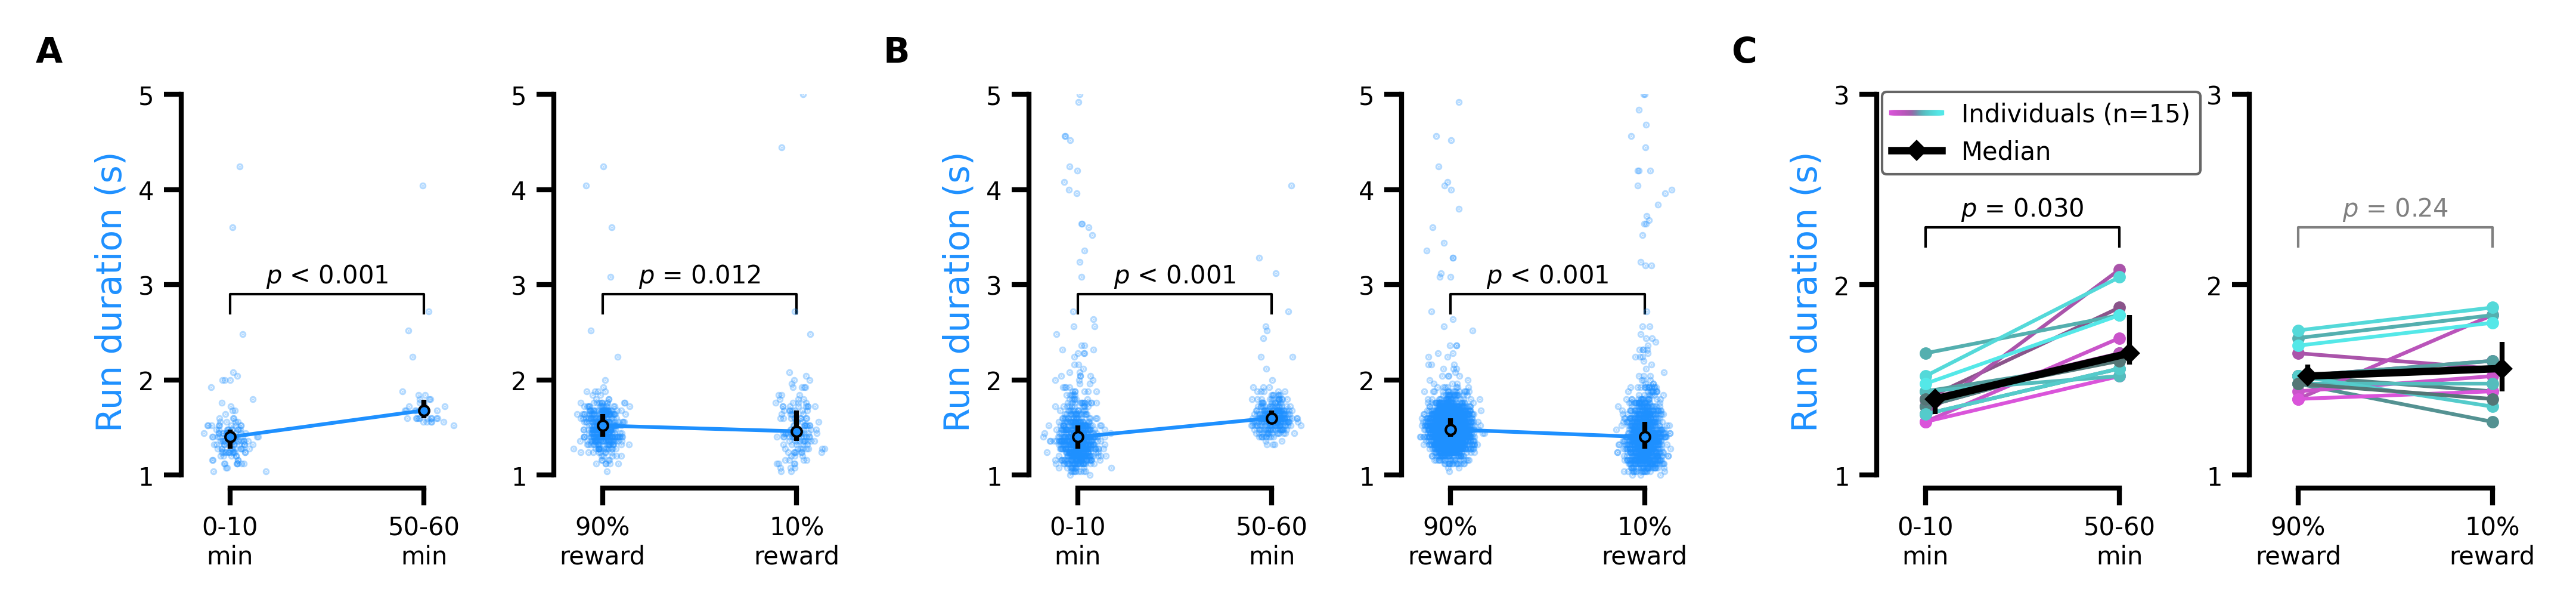

In [10]:
fig = plt.figure(figsize=(cm2inch(18), cm2inch(4)), 
                 constrained_layout=True, facecolor='w', dpi=600)


gs = fig.add_gridspec(1, 6, height_ratios=[1], width_ratios=[1, 1, 1, 1, 1, 1])

one_rat_one_session_run_t = plt.subplot(gs[0])
one_rat_one_session_run_u = plt.subplot(gs[1])

one_rat_all_sessions_run_t = plt.subplot(gs[2])
one_rat_all_sessions_run_u = plt.subplot(gs[3])

all_rats_all_session_run_t = plt.subplot(gs[4])
all_rats_all_session_run_u = plt.subplot(gs[5])


FigureS5AB_S10AB(ax=one_rat_one_session_run_t, root=root, type='run', t_or_u='t', plot_ylabel=True)
FigureS5AB_S10AB(ax=one_rat_one_session_run_u, root=root, type='run', t_or_u='u')

FigureS5AB_S10AB(ax=one_rat_all_sessions_run_t, root=root, type='run', t_or_u='t', all120sessions=True, plot_ylabel=True)
FigureS5AB_S10AB(ax=one_rat_all_sessions_run_u, root=root, type='run', t_or_u='u', all120sessions=True)

FigureS5CS_10C(ax=all_rats_all_session_run_t, root=root, type='run', t_or_u='t', plot_ylabel=True)
FigureS5CS_10C(ax=all_rats_all_session_run_u, root=root, type='run', t_or_u='u')

handles, labels = all_rats_all_session_run_t.get_legend_handles_labels()
add_colored_intact(all_rats_all_session_run_t, handles=[handles], labels=['Median'], on_fig=True,
                   text=f'Individuals (n={len(animalList)})', loc='center', bbox=(0.797, .8))


for ax, letter in zip([one_rat_one_session_run_t, one_rat_all_sessions_run_t, all_rats_all_session_run_t,], 
                      ["A", "B", "C"]):
    old_letter_on_subplot(ax, letter, x_rel=-0.5, y_rel=1.15)

plt.savefig("./Figures_paper/Figure_S10.pdf", facecolor='w', 
        edgecolor='none', bbox_inches='tight', format="pdf", dpi=600)

plt.savefig("./Figures_paper/Figure_S10.svg", facecolor='w', 
        edgecolor='none', bbox_inches='tight', format="svg", dpi=600)